In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
import re
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style()
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
warnings.filterwarnings('ignore')

data = pd.read_excel('gz.xlsx')

In [2]:
# 删除异常值和无用特征
data = data[data != '暂无数据'].dropna()
data.drop(['house_link'],inplace=True,axis=1) 

In [3]:
data['size'] = data['size'].map(lambda x:x.split('平米')[0])
data['size'] = data['size'].astype('float64')

data['danjia'] = data['danjia'].map(lambda x:x.split('元/平米')[0])
data['danjia'] = data['danjia'].astype('float64')

data['nianfen'] = data['nianfen'].map(lambda x:x.split('年建')[0])
data['nianfen'] = data['nianfen'].astype('int64')

data['zongjia'] = data['zongjia'].map(lambda x:x.split('万')[0])
data['zongjia'] = data['zongjia'].astype('float64')

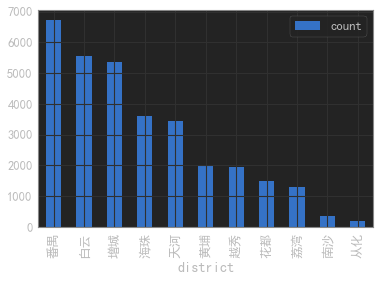

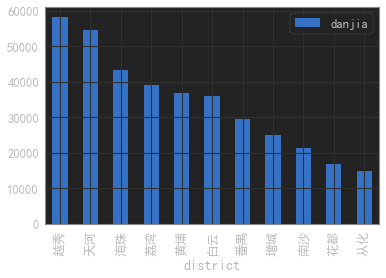

In [4]:
# 各大区二手房数量和单价柱状图
df_house_count = data['district'].value_counts().to_frame().reset_index().rename(columns={'index':'district','district':'count'})
df_house_count.plot(kind='bar',x='district',y='count')

df_house_danjia = data.groupby('district',as_index=False)['danjia'].mean().sort_values('danjia',ascending=False)
df_house_danjia.plot(kind='bar',x='district',y='danjia')

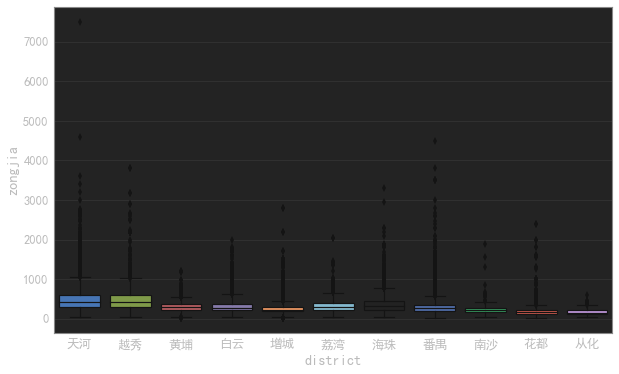

In [5]:
# 各大区二手房总价箱型图
fig,ax1 = plt.subplots(1,1,figsize=(10,6))
sns.boxplot(x='district',y='zongjia',data=data,ax=ax1)

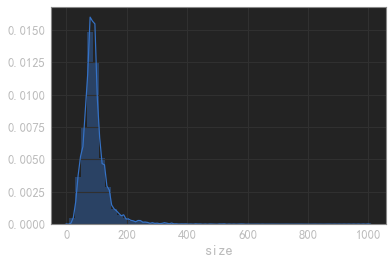

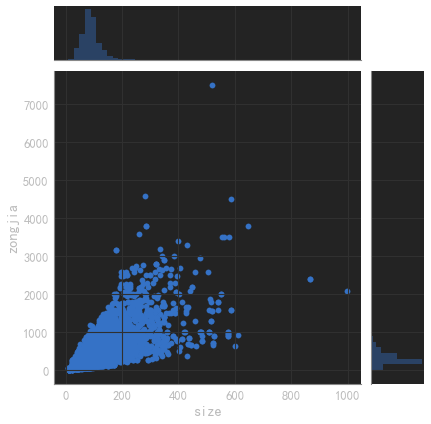

In [6]:
# 1、size分布分析
# 2、size与zongjia相关性分析
sns.distplot(data['size'])
sns.jointplot(x='size',y='zongjia',data=data)

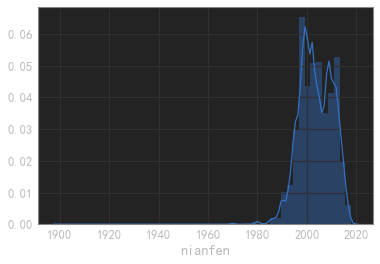

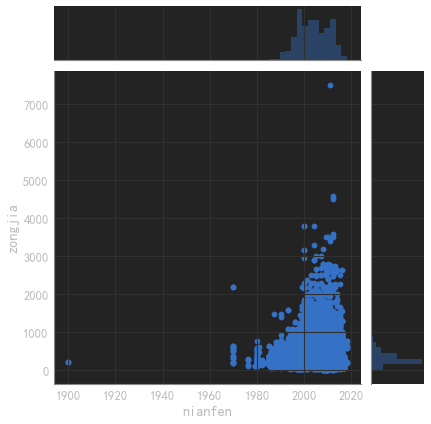

In [7]:
# 1、nianfen分布分析
# 2、nianfen与zongjia相关系分布
sns.distplot(data['nianfen'])
sns.jointplot(x='nianfen',y='zongjia',data=data)

In [8]:
# nianfen有一个1900的异常值，删掉
# data[data['nianfen'] < 1980]
data = data[data['nianfen'] > 1900]

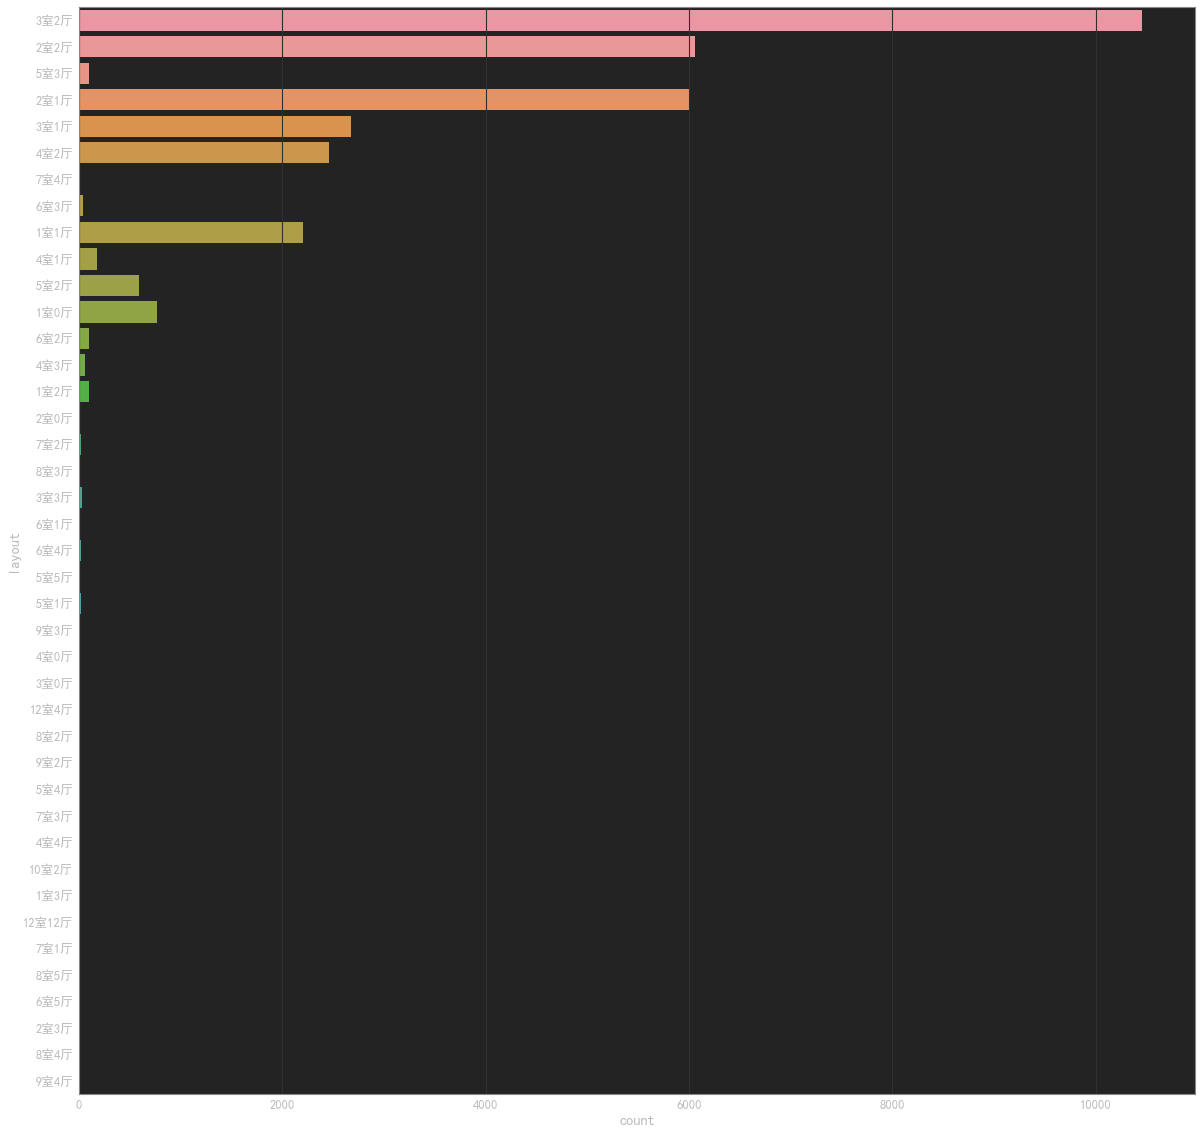

In [9]:
# layout分析
f,ax1 = plt.subplots(1,1,figsize=(20,20))
sns.countplot(y='layout',data=data,ax=ax1)

In [10]:
# chaoxiang分析
data['chaoxiang'].value_counts()

南          9835
北          5876
东南         4326
东          2305
南北         2112
东北         2097
西南         1669
西          1387
西北         1343
东西          206
东南南         155
东东南          60
南西南          48
东南北          48
南西           48
北东北          45
东南西北         34
东南西          27
东东北          27
南西北          23
西南西          23
西北北          22
东南东北         21
东南西南         20
东西北          19
南东北          16
北南           16
东南南北         15
西南东北         13
西南北          11
           ... 
北东            4
西东北           4
南东南           3
东南南西南         3
南西北北          3
西东            2
西北东南          2
东南西南西西北       2
北西南           2
东西西北          2
东南南北东北        2
东北南           2
东北东南          2
东北西北          2
北东南           1
西南西北北东北       1
西南西北北         1
西南西西北         1
东南南西          1
东南南西北         1
东南南东北         1
西南西北东北        1
东东南南西南        1
东北东北          1
南西南西北         1
南西南西          1
东北西南          1
东北北西          1
东南东南          1
北西            1
Name: chaoxiang, Length:

In [11]:
# high分析
data['high'].value_counts()

高楼层(共9层)     2122
中楼层(共9层)     1740
低楼层(共9层)     1309
低楼层(共18层)    1195
高楼层(共18层)    1097
中楼层(共18层)    1050
中楼层(共11层)     827
高楼层(共6层)      797
中楼层(共8层)      765
中楼层(共7层)      745
中楼层(共6层)      620
高楼层(共7层)      574
高楼层(共11层)     520
低楼层(共11层)     492
高楼层(共8层)      481
中楼层(共32层)     479
低楼层(共6层)      451
高楼层(共32层)     441
中楼层(共17层)     431
低楼层(共32层)     421
中楼层(共25层)     374
中楼层(共15层)     357
低楼层(共17层)     356
中楼层(共28层)     348
高楼层(共17层)     346
高楼层(共15层)     334
低楼层(共25层)     307
低楼层(共7层)      302
高楼层(共30层)     300
低楼层(共15层)     299
             ... 
中楼层(共39层)       9
中楼层(共40层)       9
中楼层(共43层)       8
低楼层(共39层)       8
中楼层(共48层)       8
高楼层(共45层)       7
低楼层(共46层)       6
中楼层(共41层)       6
高楼层(共48层)       6
高楼层(共40层)       6
高楼层(共43层)       5
中楼层(共37层)       5
低楼层(共43层)       5
高楼层(共41层)       4
低楼层(共48层)       4
高楼层(共55层)       4
高楼层(共46层)       4
中楼层(共55层)       3
低楼层(共41层)       3
高楼层(共44层)       2
地下室(共1层)        2
中楼层(共47层)       2
低楼层(共51层)       2
中楼层(共51层)       1
中楼层(共44层) 

In [12]:
# 构造新特征top_high
data['top_high'] = data['high'].map(lambda x:re.search(r'.*共(.*)层',x).group(1))

In [13]:
# 将high转换成数值型
data['high'] = data['high'].map(lambda x:x.split('楼')[0])

In [14]:
# 将high中，地下室删掉
data = data[(data['high'].isin(['高','中','低']))]

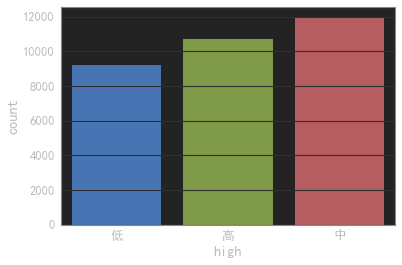

In [15]:
# high柱状图
sns.countplot(x='high',data=data)

In [16]:
# 将high高中低，转化为210
data['high'] = data['high'].map(lambda x:2 if x=='高' else 1 if x=='中' else 0)

In [17]:
# taxfree分析
data['taxfree'].value_counts()

满五年    20032
满两年    11870
Name: taxfree, dtype: int64

In [18]:
# taxfree与zongjia关系
data.groupby('taxfree')['zongjia'].mean()

taxfree
满两年    322.622918
满五年    351.036517
Name: zongjia, dtype: float64

In [19]:
# 将top_high分箱
# 分4类：低楼、中楼、中高、高楼建筑
data['top_high'] = data['top_high'].astype('int64')
bins = [0,12,18,30,60]
data['top_high'] = pd.cut(data['top_high'],bins,labels = [0,1,2,3])

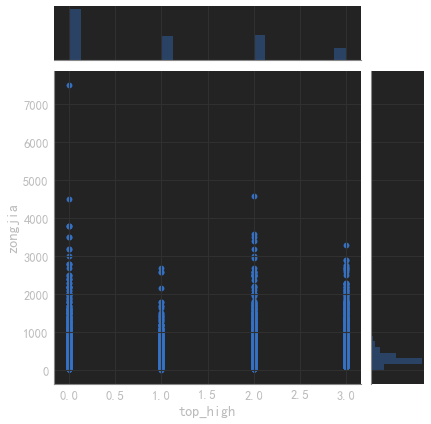

In [20]:
# top_high与zongjia关系
sns.jointplot(x='top_high',y='zongjia',data=data)

In [21]:
# taxfree标签化
data['taxfree'] = data['taxfree'].map(lambda x:0 if x=='满两年' else 1)

In [22]:
# high与zongjia关系
data.groupby(['high','top_high'])['zongjia'].mean()

high  top_high
0     0           360.719599
      1           312.452449
      2           387.514620
      3           449.428320
1     0           269.719959
      1           297.490635
      2           378.762280
      3           488.098783
2     0           276.421835
      1           323.678880
      2           406.179158
      3           500.385129
Name: zongjia, dtype: float64

In [23]:
# 按中位数对nianfen进行分箱
bins = [1969,1980,1990,2000,2010,2020]
data['nianfen'] = pd.cut(data['nianfen'],bins,labels=[0,1,2,3,4]).astype('object')

In [24]:
# 删除某些特征
data = data.drop(['area','chaoxiang','district','layout','xiaoqu'],axis=1)
data = data.drop('danjia',axis=1)

In [25]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
x_all = data.drop('zongjia',axis=1)
y_all = data['zongjia']
x_tr,x_te,y_tr,y_te = train_test_split(x_all,y_all,test_size=0.3,random_state=2019)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier,CatBoostRegressor

def stacking_cat(train_x,train_y,test_x,test_y,clf_name,class_num=1):
    model = CatBoostRegressor(iterations=17000, 
#                                depth = 8,
#                                learning_rate = 0.02,
                           loss_function='MAE',
                           eval_metric='MAE',
                           bagging_temperature=0.8,
                           od_type='Iter',
                           rsm = 0.7,
                           od_wait=2,
                           metric_period = 50,
#                                l2_leaf_reg = 20,
                           thread_count = 10,
                           random_seed = 167
                          )
    model.fit(train_x, train_y, eval_set=(test_x, test_y),use_best_model=True)
    pre= model.predict(test_x)
    return pre
y_pre = stacking_cat(x_tr.values,y_tr.values,x_te.values,y_te.values,'cat')

0:	learn: 331.9303895	test: 332.6570779	best: 332.6570779 (0)	total: 76.3ms	remaining: 21m 37s
50:	learn: 127.7874184	test: 128.7156489	best: 128.7156489 (50)	total: 2.19s	remaining: 12m 6s
100:	learn: 100.9228483	test: 102.0809182	best: 102.0809182 (100)	total: 4.34s	remaining: 12m 6s
150:	learn: 95.7032020	test: 96.8413908	best: 96.8413908 (150)	total: 6.59s	remaining: 12m 15s
200:	learn: 94.3724102	test: 95.4646649	best: 95.4646649 (200)	total: 8.81s	remaining: 12m 16s
250:	learn: 93.6599535	test: 94.8410840	best: 94.8410840 (250)	total: 11s	remaining: 12m 12s
300:	learn: 93.2409821	test: 94.4836943	best: 94.4836943 (300)	total: 13.1s	remaining: 12m 6s
Stopped by overfitting detector  (2 iterations wait)

bestTest = 94.26086816
bestIteration = 341

Shrink model to first 342 iterations.


In [27]:
# pd.DataFrame(y_te,pd.Series(y_pre))
from sklearn.metrics import mean_absolute_error
df = pd.DataFrame(list(zip(y_te,pd.Series(y_pre))))
mean_absolute_error(y_te,y_pre)

94.2608682628845

In [28]:
from sklearn.metrics import mean_squared_error
1 - mean_squared_error(y_te, y_pre) / np.var(y_te)

0.5399767979240222

In [29]:
from sklearn.metrics import r2_score
r2_score(y_te, y_pre)

0.5399767979240225

In [30]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# 计算R2分数
def performance_metric(y_true, y_predict):
    """计算并返回预测值相比于预测值的分数"""
    from sklearn.metrics import r2_score
    score = r2_score(y_true, y_predict)

    return score

# 利用GridSearchCV计算最优解
def fit_model(X, y):
    """ 基于输入数据 [X,y]，利于网格搜索找到最优的决策树模型"""
    
    cross_validator = KFold(10, shuffle=True)
      
    regressor = DecisionTreeRegressor()
    
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
    
    scoring_fnc = make_scorer(performance_metric)
    
    grid = GridSearchCV(estimator = regressor, param_grid = params, scoring = scoring_fnc, cv = cross_validator)

    # 基于输入数据 [X,y]，进行网格搜索
    grid = grid.fit(X, y)
#     print pd.DataFrame(grid.cv_results_)
    return grid.best_estimator_



In [33]:
# import visuals as vs

# 分析模型
# vs.ModelLearning(x_tr, y_tr)
# vs.ModelComplexity(x_tr, y_tr)

optimal_reg1 = fit_model(x_tr, y_tr)


In [34]:
# 输出最优模型的 'max_depth' 参数
print("最理想模型的参数 'max_depth' 是 {} 。".format(optimal_reg1.get_params()['max_depth']))


最理想模型的参数 'max_depth' 是 8 。


In [78]:

predicted_value = optimal_reg1.predict(x_te)
r2 = performance_metric(y_te, predicted_value)

print("最优模型在测试数据上 R^2 分数 {:,.2f}。".format(r2))


最优模型在测试数据上 R^2 分数 0.55。


DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [61]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# 利用GridSearchCV计算最优解
def fit_model2(X, y):
    """ 基于输入数据 [X,y]，利于网格搜索找到最优的KNN模型"""
    
    cross_validator = KFold(10, shuffle=True)
      
#     regressor = DecisionTreeRegressor()

    knn_regressor = KNeighborsRegressor(weights='distance')
    
#     params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
    k=np.ceil(np.log2(x_tr.shape[0]))
    K=np.arange(1,k+1).astype('int')
    params={'n_neighbors':K}
    
    scoring_fnc = make_scorer(performance_metric)
    
#     grid = GridSearchCV(estimator = regressor, param_grid = params, scoring = scoring_fnc, cv = cross_validator)
    knn_grid = GridSearchCV(estimator=knn_regressor,cv=5,param_grid=params,scoring='neg_mean_squared_error',n_jobs=2,verbose=1)

    # 基于输入数据 [X,y]，进行网格搜索
    grid = knn_grid.fit(X, y)
#     print pd.DataFrame(grid.cv_results_)
    return grid.best_estimator_


In [62]:
optimal_reg2 = fit_model2(x_tr, y_tr)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.6s
[Parallel(n_jobs=2)]: Done  75 out of  75 | elapsed:   14.2s finished


In [68]:
print("最理想模型的参数 'max_depth' 是 {} 。".format(optimal_reg2.get_params()['n_neighbors']))

最理想模型的参数 'max_depth' 是 15 。


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=15, p=2,
          weights='distance')

In [74]:
predicted_value2 = optimal_reg2.predict(x_te)
r2 = performance_metric(y_te, predicted_value2)

print("最优模型在测试数据上 R^2 分数 {:,.2f}。".format(r2))

最优模型在测试数据上 R^2 分数 0.62。


In [89]:
pd.DataFrame({'房价实际值(万元)':y_te,'房价预测值(万元)':predicted_value})

,房价实际值(万元),房价预测值(万元)
40444,162.0,193.800692
21860,280.0,298.378012
41216,110.0,123.037037
28701,190.0,241.169118
51119,260.0,370.936947
24700,282.0,243.535842
20878,425.0,471.688364
30729,520.0,503.065625
273,460.0,370.936947
37606,135.0,170.995381
